<a href="https://colab.research.google.com/github/DataScienceCoach/Univariate-Logistic-Regression-Model/blob/main/Adeyemo_ETIM8535WK3_Univariate_Logistic_Regression_on_the_Bejaia_Region_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT BACKGROUND**

NAME: Emmanuel A. Adeyemo

CLASS: TIM-8535 UNIVARIATE ANALYSIS.

The purpose of this project is to demonstrate univariate logistic regression method used to determine the extent of a relationship between variables using binary classifcation.

**Problem:**

Given the Algerian_forest_fires_dataset_UPDATE for both Bejaia Region and and Sidi Bel-abbes region, encompassing meteorological and fire-related attributes, we need to determine the likelihood of a wildfire (binary classification) based on a single predictor variable (Temperature) from the dataset.

**Research question:**

Is Temperature a predictor for the likelihood of a wildfire occurrence within the Bejaia and Sidi Bel-abbes regions?

In this case, we will build a logistic regression model to predict the occurence for the target class indicating ('fire' or 'not fire') (categorical).

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode #visualization
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing #label encoder
from sklearn.model_selection import train_test_split #split data
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.metrics import classification_report #reports
from sklearn import metrics #confusion metrics
from sklearn.model_selection import GridSearchCV #get best parameters

In [ ]:
#create 2-dimensional dataFrame from a imported data.
#Choose the local file (Algerian_forest_fires_dataset_UPDATE.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving BejaiaRegionfireDataset .csv to BejaiaRegionfireDataset .csv


In [ ]:
#Import file to Google Colab and read it into a dataframe called df.
import io
# Read in data
df = pd.read_csv(io.BytesIO(uploaded['BejaiaRegionfireDataset .csv']))

# **DATA PREPROCESSING**

In [ ]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,ClassD
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [ ]:
# view dataset information (shows data types, null values, features, number of observations)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  ClassD       244 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 26.8+ KB


In [ ]:
df.shape

(244, 14)

In [ ]:
# Concatenate the Numeric columns in the dataset and run the Descriptive statistics
df1_concat = pd.concat([ df['Temperature'], df[' RH'], df[' Ws'], df['Rain '], df['FFMC'], df['DMC'], df['DC'], df['ISI'],
                          df['BUI'], df['FWI']], axis="columns")
df1_concat.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,7.006557
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,7.438889
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,4.200000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,31.100000


In [ ]:
# Convert all the quantitative variables from object datatype to interger datatype

#df1_concat = df1_concat.astype(int)

#df1_concat.describe()

In [ ]:
# Concatenate the categorical columns in the dataset and run their frequency distribution count.
df2_concat = pd.concat([ df['day'], df['month'], df['year']], axis="columns")

df2_concat

,day,month,year
0,1,6,2012
1,2,6,2012
2,3,6,2012
3,4,6,2012
4,5,6,2012
...,...,...,...
239,26,9,2012
240,27,9,2012
241,28,9,2012
242,29,9,2012


In [ ]:
#Check the datatype
df2_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     244 non-null    int64
 1   month   244 non-null    int64
 2   year    244 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [ ]:
# Convert all the categorical  variables from their current datatype to object datatype

df21_concat = df2_concat.astype(object)


In [ ]:

# confirm to see if all categorical variables are now of the object datatype.
df21_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     244 non-null    object
 1   month   244 non-null    object
 2   year    244 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [ ]:
# Run the frequency counts on object data type columns
df21_concat.select_dtypes(include=['object']).describe()

,day,month,year
count,244,244,244
unique,31,4,1
top,1,7,2012
freq,8,62,244


In [ ]:
# Run descriptives (frequencies, percentages) on object data type columns
col=df21_concat.select_dtypes(include=['object']).columns.tolist()
# Create iteration of object columns
for i in col:
    count=df21_concat[i].value_counts()
    percent=df21_concat.groupby(['day'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"month":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"}))

,month,Percent
1,8,100.0%
2,8,nan%
3,8,nan%
4,8,nan%
5,8,nan%
6,8,nan%
7,8,nan%
8,8,nan%
9,8,nan%
10,8,nan%


,month,Percent
6,60,25.0%
7,62,25.0%
8,62,25.0%
9,60,25.0%


,month,Percent
2012,244,100.0%


In [ ]:
freq_table= df21_concat.groupby(['month']).size().reset_index(name='Count').rename(columns={'month':'month'})
freq_table

,month,Count
0,6,60
1,7,62
2,8,62
3,9,60


In [ ]:
# Concatenate the Numeric columns in the dataset and run the Descriptive statistics
df1_concat = pd.concat([ df['Temperature'], df[' RH'], df[' Ws'], df['Rain '], df['FFMC'], df['DMC'], df['DC'], df['ISI'],
                          df['BUI'], df['FWI']], axis="columns")
df1_concat

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [ ]:
# Check for outliers using boxplots
fig = make_subplots(rows=2, cols=3,
                    # Set the subplot titles
                    subplot_titles=['Temperature','DC', 'ISI', 'FFMC', 'DMC', 'BUI', 'FWI'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=df1_concat.Temperature, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=df1_concat.DC, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=df1_concat.ISI, name='', showlegend=False), row=1, col=3)
fig.add_trace(go.Box(x=df1_concat.FFMC, name='', showlegend=False), row=2, col=1)
fig.add_trace(go.Box(x=df1_concat.DMC, name='', showlegend=False), row=2, col=2)
fig.add_trace(go.Box(x=df1_concat.BUI, name='', showlegend=False), row=2, col=2)
fig.add_trace(go.Box(x=df1_concat.FWI, name='', showlegend=False), row=2, col=2)

#config size
fig.update_layout(height=500, width=900)
#show visualizations
fig.show()

Temperature has an outliers and some other remaining variables has an outlier too. we can remedy each of the variables with outliers with IQR because they have a skewed distribution.

#### Removing outlier using the IQR because most of the distribution are skewed

<ipython-input-141-07898f516b98>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-141-07898f516b98>:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




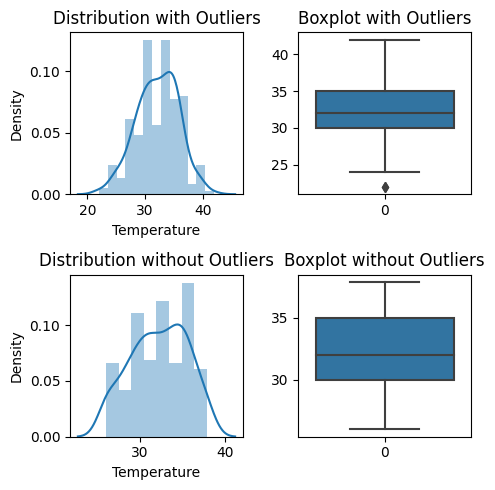

In [ ]:
# Removing outlier from variable "Temperature"using the IQR because most of the distribution are skewed

clean_df_cap = df1_concat.copy()
upper_limit = df1_concat['Temperature'].quantile(0.95)
lower_limit = df1_concat['Temperature'].quantile(0.05)

clean_df_cap['Temperature'] = np.where(
    clean_df_cap['Temperature'] > upper_limit,
    upper_limit,
    np.where(
        clean_df_cap['Temperature'] < lower_limit,
        lower_limit,
        clean_df_cap['Temperature']
    )
)

# Create Visualization with and without outliers.
plt.figure(figsize=(5, 5))

# Distribution and boxplot with outliers
plt.subplot(2, 2, 1)
sns.distplot(df1_concat['Temperature'])
plt.title("Distribution with Outliers")

plt.subplot(2, 2, 2)
sns.boxplot(df1_concat['Temperature'])
plt.title("Boxplot with Outliers")

# Distribution and boxplot without outliers
plt.subplot(2, 2, 3)
sns.distplot(clean_df_cap['Temperature'])
plt.title("Distribution without Outliers")

plt.subplot(2, 2, 4)
sns.boxplot(clean_df_cap['Temperature'])
plt.title("Boxplot without Outliers")

plt.tight_layout()
plt.show()

# **BUILD LOGISTIC MODEL**

In [ ]:
# Convert array to DataFrame
clean_df_capframe = pd.DataFrame(clean_df_cap)

# Print the DataFrame
clean_df_capframe

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [ ]:
#Accessing Clean Temperature variable denoted as "0"

clean_df_capframe['Temperature']

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [ ]:
# Binary classification variable(0 = not fire, 1 = fire)

df['ClassD']

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: ClassD, Length: 244, dtype: int64

In [ ]:
# Create target value and label
y= df['ClassD']
X= clean_df_capframe['Temperature']  # Temperature variable

In [ ]:
X

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [ ]:
# Create target value and label
y= df['ClassD']
X= clean_df_capframe['Temperature']  # Temperature variable

# Create the parameters
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Create the logistic regression model
logreg = LogisticRegression(solver='liblinear',max_iter=10000)

# Split data into train and test sets (70% train 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Detect the best parameter
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Convert pandas Series to numpy arrays and reshape
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Detect the best parameter
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the model with the reshaped data
logreg_cv.fit(X_train_reshaped, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7705882352941177


In [ ]:
# Create the Logistic Regression model with the parameters
logreg2 = LogisticRegression(C=0.051, penalty="l2")
logreg2.fit(X_train_reshaped, y_train)

# Calculate the score using the reshaped test data
score = logreg2.score(X_test_reshaped, y_test)
print("Score:", score)


Score: 0.6486486486486487


In [ ]:
# Predict data
y_pred=logreg2.predict(X_test_reshaped)

y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0])

# **MODEL PERFORMANCE**

In [ ]:
# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18, 14],
       [12, 30]])

Text(0.5, 427.9555555555555, 'Predicted label')

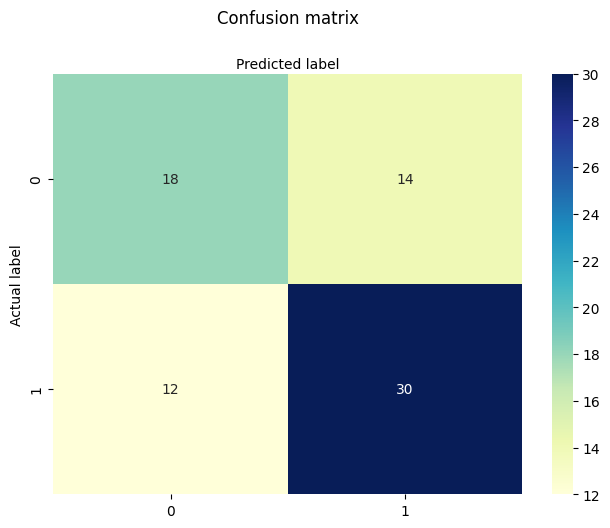

In [ ]:
# Create heatmap of confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6486486486486487
Precision: 0.6818181818181818
Recall: 0.7142857142857143


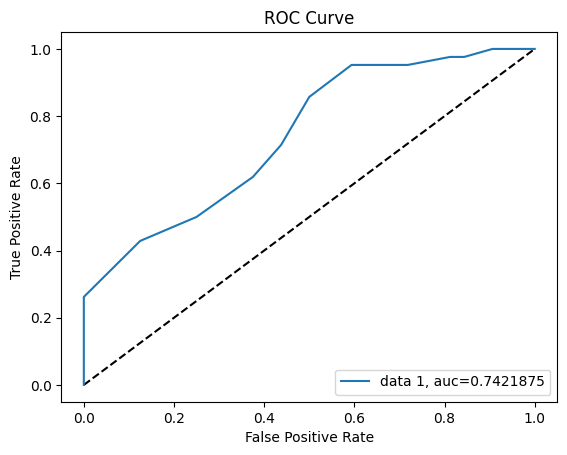

In [ ]:
# Create the Receiver Operating Characteristic (ROC) Curve
y_pred_proba = logreg2.predict_proba(X_test_reshaped)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

# **REPORT OF FINDINGS & INSIGHTS**


**Statistical Findings**

* Accuracy: 0.6486486486486487 (proportion of correct classifications)
* Precision: 0.6818181818181818 (positive predictive value)
* Recall: 0.7142857142857143 (sensitivity of model to detect)

The area under the curve shown on the ROC curve is 0.74 which is considered acceptable (the model has the ability to predict the likelihood of a wildfire (no fire or fire)). However, a 0.85 level is needed to have a high classification accuracy, its so obvious that with temperature been the only predictor and having this high performance, if other variables are included as predictors the model should have a perfect classsification acuracy.


**Answering the Research question:**

Is Temperature a predictor for the likelihood of a wildfire occurrence within the Bejaia and Sidi Bel-abbes regions?

The answer to this research problem is yes, temperature is a good predictor for the likelihood of a wildfire occurrence within the Bejaia and Sidi Bel-abbes regions?


**Insight and Conclusion**

Given the results from the univariate logistic regression analysis, the model is able to predict the likelihood of a wildfire (no fire or fire) about 74% of the time with just one predictore variable (Temperature).
Additional univariate regression analysis is warranted using other single predictors to determine if they serve as predictors of wildfire occurence.

**Applied Actionable Insights**

The analysis of the "Bejaia Region Dataset" provides actionable insights into predicting wildfire occurrence and its relationship with temperature and the Fire Weather Index (FWI). These insights are valuable for both technical and non-technical audiences, aiding in informed decision-making and fire risk management strategies. The logistic regression analysis demonstrates that temperature is a significant predictor of wildfire occurrence, guiding fire management agencies to monitor temperature variations closely and initiate preventive measures during heightened risk. The linear regression analysis demonstrates a positive linear relationship between temperature and the Fire Weather Index (FWI), a key indicator of fire danger. This helps meteorological and fire management teams accurately assess fire danger levels. The findings provide actionable recommendations for fire management agencies, policymakers, and the public to proactively address fire risk and enhance safety measures. The conclusion that temperature significantly influences wildfire likelihood aligns with previous research on the link between meteorological factors and fire occurrence. Studies such as "Effects of Weather and Fuel Conditions on Fire Behavior" by Sullivan et al. (2017) demonstrate the strong correlation between temperature and fire danger. This strengthens the reliability of our finding and its actionable implications. The identification of a linear relationship between temperature and the FWI is in accordance with existing fire danger assessment methodologies. Works like "Canadian Forest Fire Danger Rating System: Background and Application" by Van Wagner (1987) establish the scientific basis for using the FWI to quantify fire danger based on meteorological variables.

Conclusion.

The insights drawn from our analyses provide actionable recommendations for fire management agencies, policymakers, and the public. By considering temperature's role in wildfire occurrence and its impact on the Fire Weather Index, stakeholders can proactively address fire risk and enhance safety measures. These findings, rooted in established scientific research, offer a comprehensive approach to mitigating the impact of wildfires.
